# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\yepeng\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


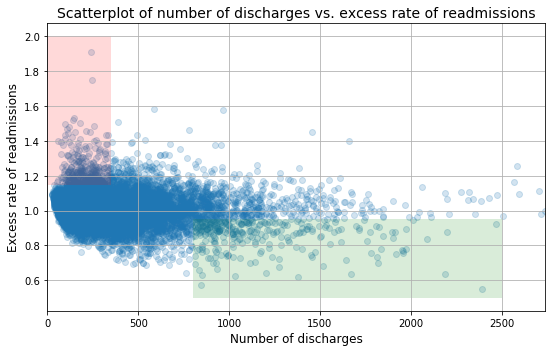

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
x = pd.DataFrame(x)
y = pd.DataFrame(y)
df = pd.concat([x,y], axis=1)
df.columns = ['discharges', 'excess_readmissions']
df.head()

,discharges,excess_readmissions
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


#### Overall, rate of readmissions is trending down with increasing number of discharges
We can find this to be true because of the small p-value attached to the negative trendline. (99% confidence)

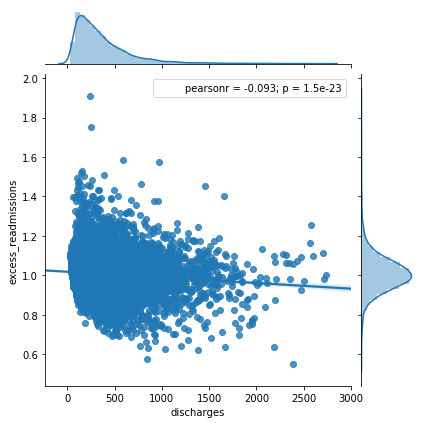

In [6]:
import seaborn as sns
sns.jointplot('discharges', 'excess_readmissions', data=df, kind='reg')

#### With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
The p-value is a bit larger than 0.05; which is needed for 95% confidence. However, 0.09 is good enough for 90% confidence.

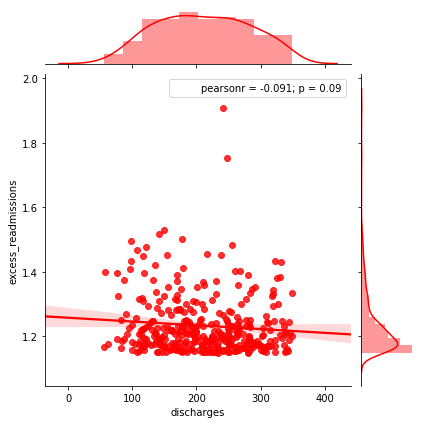

In [7]:
red = df[df.discharges <= 350]
red = red[red['excess_readmissions'] >= 1.15]
red = red[red['excess_readmissions'] <= 2.00]
sns.jointplot('discharges', 'excess_readmissions', data=red, kind='reg', color="r")

#### With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
We can find this to be true because of the small p-value attached to the negative trendline. (99% confidence)

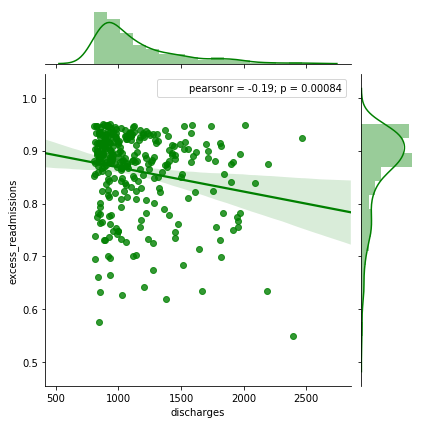

In [8]:
green = df[df.discharges >= 800]
green = green[green.discharges <= 2500]
green = green[green['excess_readmissions'] >= 0.50]
green = green[green['excess_readmissions'] <= 0.95]
sns.jointplot('discharges', 'excess_readmissions', data=green, kind='reg', color="g")

#### In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [9]:
lo_df = df[df.discharges < 100]
_, lo_excess_readmissions = lo_df.mean()
lo_greater_than_one = len(lo_df[lo_df.excess_readmissions > 1]) / len(lo_df)

print('Mean excess readmission rate :', '%.3f' % lo_excess_readmissions)
print('%.2f' % lo_greater_than_one, 'have excess readmission rate greater than 1.')

Mean excess readmission rate : 1.023
0.63 have excess readmission rate greater than 1.


#### In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 45% have excess readmission rate greater than 1
NOTE: Although this is true, there is no trend that says excess readmission rates decrease . See joint plot for more info. (p=0.65) Thus, this statistic could be not significant.

In [10]:
hi_df = df[df.discharges > 1000]
_, hi_excess_readmissions = hi_df.mean()
hi_greater_than_one = len(hi_df[hi_df.excess_readmissions > 1]) / len(hi_df)

print('Mean excess readmission rate :', '%.3f' % hi_excess_readmissions)
print('%.2f' % hi_greater_than_one, 'have excess readmission rate greater than 1.')

Mean excess readmission rate : 0.979
0.45 have excess readmission rate greater than 1.


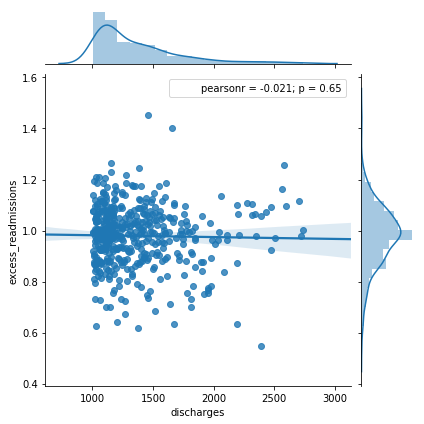

In [11]:
sns.jointplot('discharges', 'excess_readmissions', data=hi_df, kind='reg')

#### There is a significant correlation between hospital capacity (number of discharges) and readmission rates. (99% confidence)
This conclusion follows our first observation.

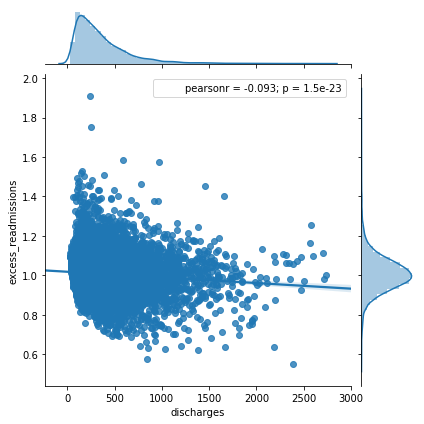

In [12]:
sns.jointplot('discharges', 'excess_readmissions', data=df, kind='reg')

#### Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
According to the data, this a reasonable. However, there may be other factors such as insurance and doctor ratings not available in the data.

#### Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
This is a bold recommendation. We need to see the pros and cons of introducing upgraded resource allocation.
Pros
Save patient time
Increase space for new patients
Secure government funding
Cons
Less readmissions could result in less income
Low income could lead to shut down of smaller hospitals
If trying to meet regulatory policies, then smaller hospitals should be required to demonstrate upgraded resource allocation. However, at a business perspective, they should be reccomended to do so only if it is beneficial for the hospital itself.

In [13]:
lo_df = df[df.discharges < 300]
lo_discharges, lo_excess_readmissions = lo_df.mean()
lo_greater_than_one = len(lo_df[lo_df.excess_readmissions > 1]) / len(lo_df)

print('Excess readmission rate :', '%.3f' % lo_excess_readmissions)
print('%.2f' % lo_greater_than_one, 'have excess readmission rate greater than 1.')

Excess readmission rate : 1.014
0.54 have excess readmission rate greater than 1.


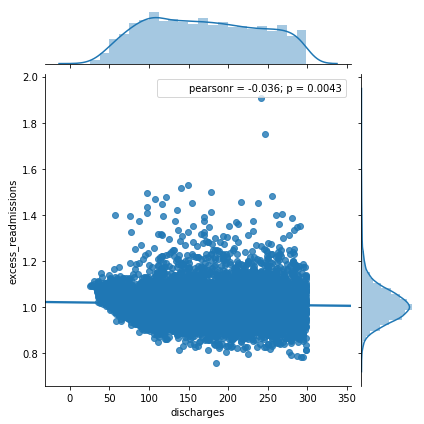

In [14]:
sns.jointplot('discharges', 'excess_readmissions', data=lo_df, kind='reg')

#### Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
Following the previous logic, this could benefit patient or the hospital. The directives and incentives should vary due to different circumstances. For example, larger hospitals with more flexible budgets could focus on less excess readmission. Smaller hospitals could be encouraged to consolidate if it could benefit them over simply reallocating resources.

### New Hypothesis Testing
Our new hypothesis is going to be: There is a significant difference between excess readmission rates for different states.

In [15]:
# Making a new dataframe with state variables 

x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(x)
y = pd.DataFrame(y)

df = pd.concat([x,y], axis=1)
df.columns = ['state', 'excess_readmissions']
df = df.groupby('state').mean().reset_index()
df.head()

,state,excess_readmissions
0,AK,0.979645
1,AL,1.019177
2,AR,1.030027
3,AZ,0.998832
4,CA,0.996700


In [16]:
# Filtering the top and bottom 10 states with excess readmission rates.
lo_excess = df.sort_values(by='excess_readmissions').head(10)
hi_excess = df.sort_values(by='excess_readmissions').tail(10)

Here we have the bar plot for the top 10 and bottom 10 states with excess readmission rates. To test for significant difference, we are going to test SD (South Dakota) and DC (District of Columbia). We picked these two because SD had the lowest excess readmission rate and DC had the highest.

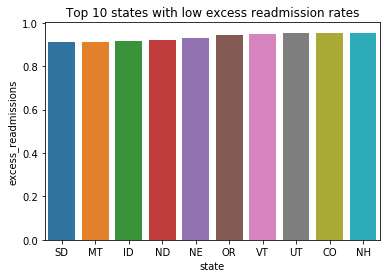

In [18]:
sns.barplot('state', 'excess_readmissions', data=lo_excess)
plt.title('Top 10 states with low excess readmission rates')

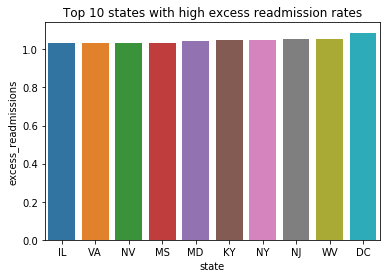

In [19]:
sns.barplot('state', 'excess_readmissions', data=hi_excess)
plt.title('Top 10 states with high excess readmission rates')

In [20]:
## Going back to original dataframe
x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(x)
y = pd.DataFrame(y)

df = pd.concat([x,y], axis=1)
df.columns = ['state', 'excess_readmissions']
df.head()

,state,excess_readmissions
0,MD,1.0914
1,MD,1.0961
2,MD,1.0934
3,CA,1.0908
4,PA,1.1123


In [21]:
# Data for SD (South Dakota)
sd = df[df.state == 'SD']
sd = sd['excess_readmissions']
sd.describe()

count    41.000000
mean      0.909824
std       0.099959
min       0.660000
25%       0.841600
50%       0.903100
75%       0.973600
max       1.152300
Name: excess_readmissions, dtype: float64

In [22]:
# Data for DC (District of Columbia)
dc = df[df.state == 'DC']
dc = dc['excess_readmissions']
dc.describe()

count    29.000000
mean      1.087121
std       0.140087
min       0.939400
25%       1.019900
50%       1.074800
75%       1.105900
max       1.752100
Name: excess_readmissions, dtype: float64

In [23]:
import scipy as sp
sp.stats.ttest_ind(sd, dc)

Ttest_indResult(statistic=-6.1848398915044598, pvalue=4.0301006708812007e-08)

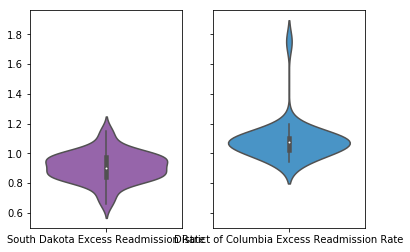

In [24]:
# Visualizing conclusion with violin plot

sd = df[df.state == 'SD'][['excess_readmissions']]
sd.columns = ['South Dakota Excess Readmission Rate']

dc = df[df.state == 'DC'][['excess_readmissions']]
dc.columns = ['District of Columbia Excess Readmission Rate']

fig, axs = plt.subplots(ncols=2, sharey=True)
sns.violinplot(data=sd, ax=axs[0], color='#9b59b6')
sns.violinplot(data=dc, ax=axs[1], color='#3498db')

### Conclusion
There is a significant difference between excess readmission rates for South Dakota Excess and 'District of Columbia Excess Readmission Rate' at p value = 0.05.

#### Discussion
Excess readmission could be problematic for hospitals dependent of patients using Medicare payments. The first observation suggested that amount of discharges was related to excess readmission rate. After testing, it was true. However, there could be many uncontrolled variables that leads to low or even high discharges. The quick soultion to this was to combine smaller hospitals to make it have higher dispatch rates. This isn't an optimal solution since it requires even more funding to make this occur. The cost may be even more than trying to keep Medicare patients.
The second hypothesis that I made, suggesting that different states having different excess readmission rate looks at this problem in a different angle. It combines all of the hostpitals in each state regardless of dispatches or size. It looks at the average of excess readmission. This method focuses on which states are the best or worst at low excess readmission rates. My assumption is that the better states have better regulatory practices that ensures lower excess readmission rates. We should look at the top states with low excess readmission rates such as South Dakota to see what different practices they have compared to states like the district of Columbia.